# Import libraries

In [140]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [144]:
df=pd.read_csv('CPU_benchmark_v4.csv')

# Explore data analysis

* Having a general view of dataset

In [145]:
# Check the size of dataset
df.shape

(3825, 12)

In [146]:
# Random select 10 rows of data to have a basic view
df.sample(10)

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
2714,AMD Opteron 2220,1038.26,1106,1.07,553,0.53,95.0,11.64,2,2009,F (1207),Server
805,AMD Ryzen 5 3580U,NaN,7846,NaN,2125,NaN,15.0,523.09,4,2019,FP5,Laptop
649,AMD Ryzen 3 PRO 4450U,NaN,10129,NaN,2364,NaN,15.0,675.29,4,2020,FP6,Laptop
2375,Intel Celeron G1830 @ 2.80GHz,89.00,1560,17.53,1513,17.00,53.0,29.44,2,2014,LGA1150,Desktop
326,AMD Ryzen 5 PRO 6650U,NaN,18649,NaN,3277,NaN,28.0,666.04,6,2022,FP7,Laptop
3020,Intel Pentium 997 @ 1.60GHz,NaN,789,NaN,729,NaN,17.0,46.42,2,2012,BGA-1023,Unknown
1621,"Qualcomm Technologies, Inc LITO",NaN,3097,NaN,1559,NaN,NaN,NaN,8,2021,unknown,Mobile/Embedded
995,Intel Xeon E-2254ML @ 1.70GHz,NaN,6333,NaN,2029,NaN,25.0,253.31,4,2019,FCBGA1440,Server
590,Intel Xeon E5-2640 v3 @ 2.60GHz,59.00,11205,189.91,1865,31.60,90.0,124.5,8,2014,LGA2011-v3,Server
917,Intel Core i7-6820HQ @ 2.70GHz,NaN,6939,NaN,1990,NaN,45.0,154.2,4,2015,FCBGA1440,Laptop


* Calculate the missing value percentage
* Count columns with missing values

In [147]:
# total null values per column
print(df.isnull().sum())
print('_'*40)
all_data_na = (df.isnull().sum() / len(df)) * 100
print(all_data_na)


cpuName           0
price          1858
cpuMark           0
cpuValue       1858
threadMark        0
threadValue    1858
TDP             685
powerPerf       685
cores             0
testDate          0
socket            0
category          0
dtype: int64
________________________________________
cpuName         0.000000
price          48.575163
cpuMark         0.000000
cpuValue       48.575163
threadMark      0.000000
threadValue    48.575163
TDP            17.908497
powerPerf      17.908497
cores           0.000000
testDate        0.000000
socket          0.000000
category        0.000000
dtype: float64


In [148]:
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False) 
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})
# Look at the most heavily missing features
missing_data.head(10)

,Missing Ratio
threadValue,48.575163
cpuValue,48.575163
price,48.575163
powerPerf,17.908497
TDP,17.908497


In [149]:
missing_data.shape[0]

5

# Data processing

* Drop the rows with Null value

In [150]:
df=df.dropna()

* Check the Percentage of missing value again.

In [151]:
print(df.isnull().sum())
print('_'*40)
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

cpuName        0
price          0
cpuMark        0
cpuValue       0
threadMark     0
threadValue    0
TDP            0
powerPerf      0
cores          0
testDate       0
socket         0
category       0
dtype: int64
________________________________________
             column_name  percent_missing
cpuName          cpuName              0.0
price              price              0.0
cpuMark          cpuMark              0.0
cpuValue        cpuValue              0.0
threadMark    threadMark              0.0
threadValue  threadValue              0.0
TDP                  TDP              0.0
powerPerf      powerPerf              0.0
cores              cores              0.0
testDate        testDate              0.0
socket            socket              0.0
category        category              0.0


In [ ]:
# Using labelencoder to encode the categorical variables
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["cpuName"]=le.fit_transform(df["cpuName"])
df["socket"]=le.fit_transform(df["socket"])
df["category"]=le.fit_transform(df["category"])

In [203]:
df

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
1,243,7299.99,88338,12.10,2635,0.36,280.0,315.49,64,2021,114,8
3,241,7060.00,85861,12.16,2727,0.39,225.0,381.6,64,2021,114,8
4,474,6807.98,83971,12.33,2626,0.39,280.0,299.9,64,2020,129,0
5,471,8399.69,81568,9.71,2569,0.31,280.0,291.31,64,2020,128,0
8,237,5424.99,76455,14.09,2695,0.50,225.0,339.8,48,2021,114,8
...,...,...,...,...,...,...,...,...,...,...,...,...
3696,194,50.95,195,3.83,301,5.90,66.0,2.96,1,2009,117,0
3697,195,58.99,195,3.31,311,5.28,70.0,2.79,1,2009,117,0
3725,539,635.99,177,0.28,254,0.40,10.0,17.7,1,2010,29,0
3727,193,51.25,176,3.44,272,5.30,64.0,2.75,1,2009,118,0


# Descriptive statistical analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

* Boxplot

In [ ]:
# sns.set_theme(style="ticks", palette="pastel")

# # Draw a nested boxplot to show bills by day and time
# sns.boxplot(x="day", y="total_bill",
#             hue="smoker", palette=["m", "g"],
#             data=df)
# sns.despine(offset=10, trim=True)

* Correlation matrix

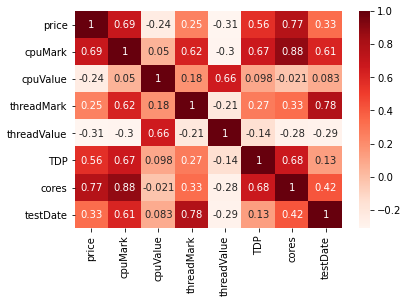

In [21]:
#Using Pearson Correlation
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


* Pairplot

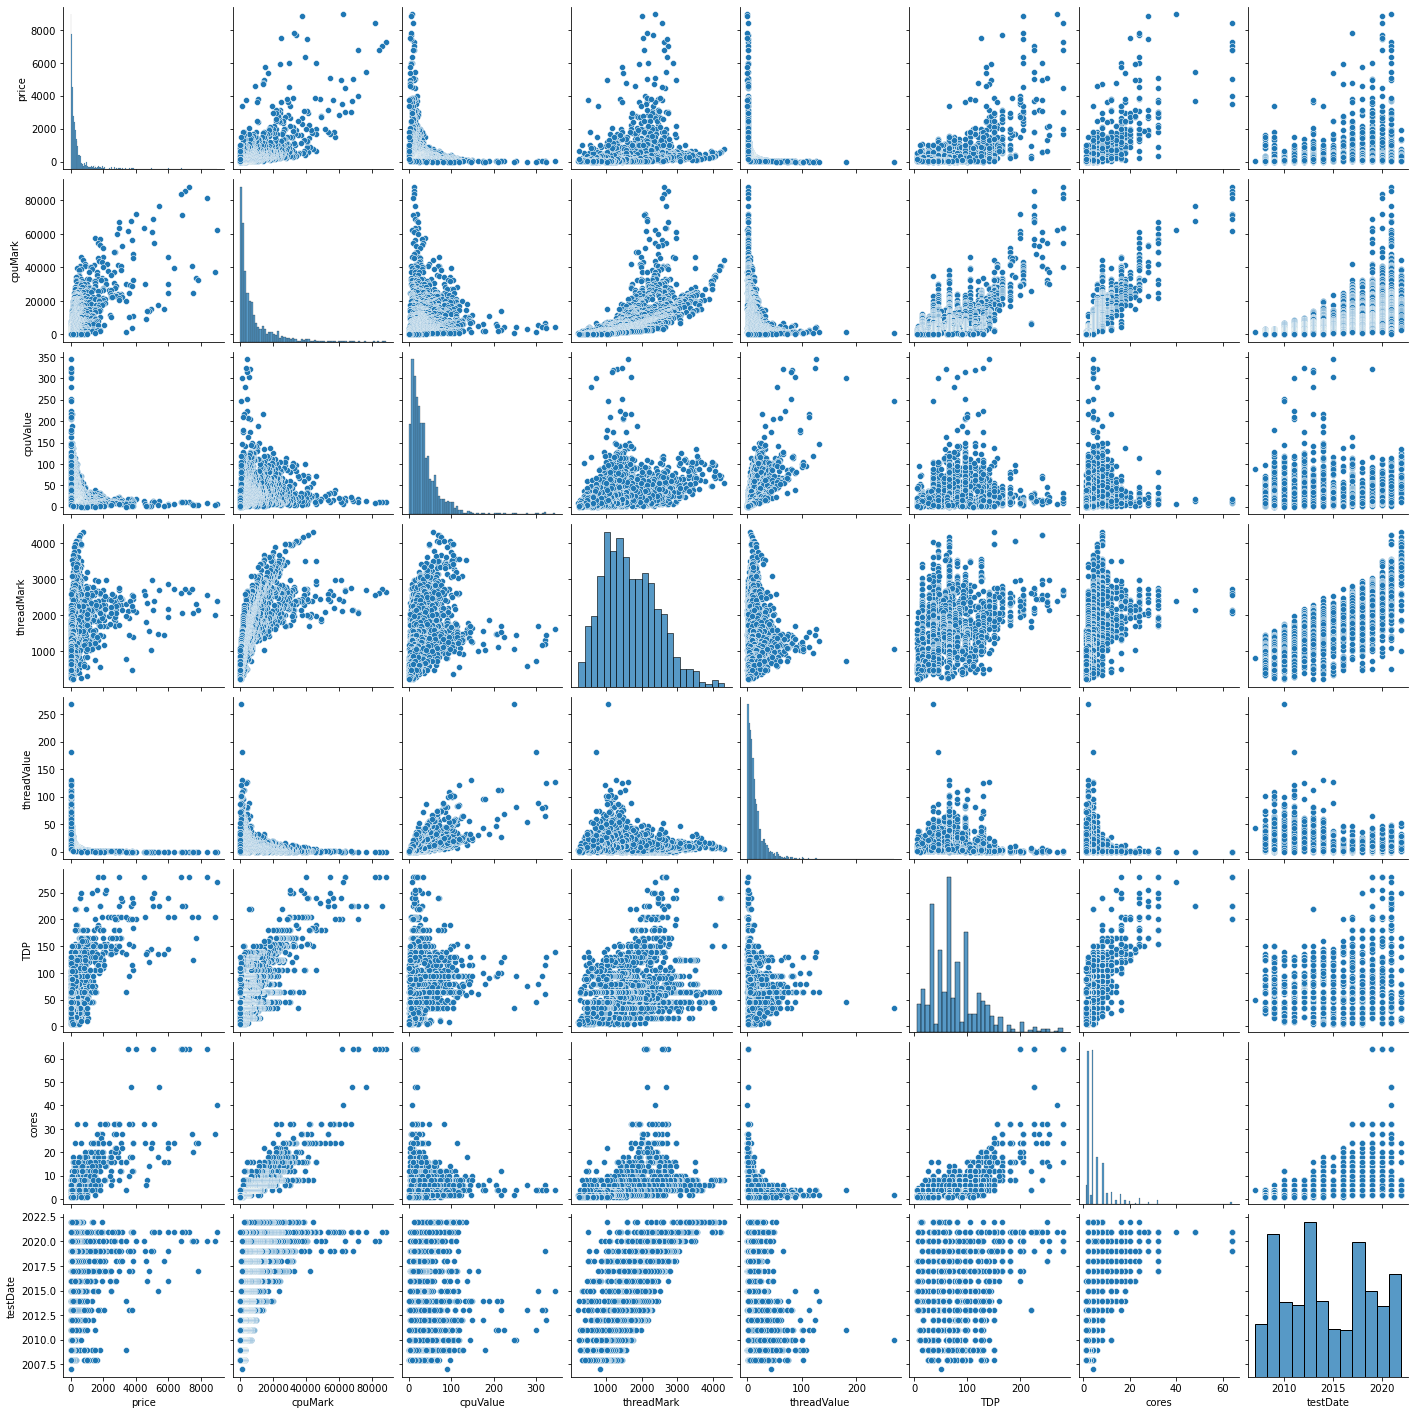

In [22]:
sns.pairplot(df)

# Split the dataset into train and test dataset

* Select Target feature from dataset as label
* The train dataset would not contain target feature
* If the train dataset contain label, the model would memories the distribution of dataset. It would be overfitting. Even if the model has better performance in training dataset, it would have bad performance in prediction. Because this kind of model lack of generlization.

# Feature selection

## Filter method

In [184]:
import pandas as pd
import numpy as np
import matplotlib
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

Filtering and taking only the subset of the relevant features. The model is built after selecting the features. The filtering is using correlation matrix, and it is most commonly using.

At first, plotting the Pearson correlation heat-map and see the correlation of independent variables with the target variable. We could only select features which has correlation of above 0.5 (taking absolute value) with the target variable.

* A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
* A value closer to 1 implies stronger positive correlation
* A value closer to -1 implies stronger negative correlation

In [186]:
#Correlation with output variable
cor = df.corr()
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

price      1.000000
cpuMark    0.691836
TDP        0.562841
cores      0.766716
Name: price, dtype: float64

Hence we can drop all other features apart from these. However this is not the end of the process. One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop others. Next, checking the correlation of selected features with each other. This can be done either by visually checking it from the above correlation matrix.

In [187]:
print(df[["cpuMark","TDP"]].corr())
print(df[["cpuMark","cores"]].corr())
print(df[["TDP","cores"]].corr())

          cpuMark       TDP
cpuMark  1.000000  0.669211
TDP      0.669211  1.000000
          cpuMark     cores
cpuMark  1.000000  0.883812
cores    0.883812  1.000000
            TDP     cores
TDP    1.000000  0.676485
cores  0.676485  1.000000


## Wrapper Method

A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. It needs to feed the features to the selected Machine Learning algorithm, and based on the model performance to add/remove the features. This is an iterative and computationally expensive process but it is usually more accurate than the filter method.

### RFE (Recursive Feature Elimination)

The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [204]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 11)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1]


We took LinearRegression model with all features, and RFE gave feature ranking as above. Then we need to find the optimum number of features, for which the accuracy is the highest. We do that by using loop starting with 1 feature and going up to the number of features. We then take the one for which the accuracy is highest.

In [205]:
#num of features
num_feature_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof = 0           
score_list =[]
for n in range(len(num_feature_list)):
    X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.33, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,num_feature_list[n])
    X_train_rfe = rfe.fit_transform(X_train,Y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,Y_train)
    score = model.score(X_test_rfe,Y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = num_feature_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.423175


As seen from the result, the optimum number of features is XXX. We feed XX as number of features to RFE and get the final set of features given by RFE method, as follows.

In [206]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['cpuName', 'price', 'cpuValue', 'threadMark', 'threadValue', 'TDP',
       'powerPerf', 'cores', 'testDate', 'socket'],
      dtype='object')


## Embedded method

Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

We can do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes its coefficient and convert it into 0. Hence the features are removed if its coefficient = 0, and keep the rest of features.

In [200]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 446.372974
Best score using built-in LassoCV: 0.221534


In [201]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 3 variables and eliminated the other 8 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

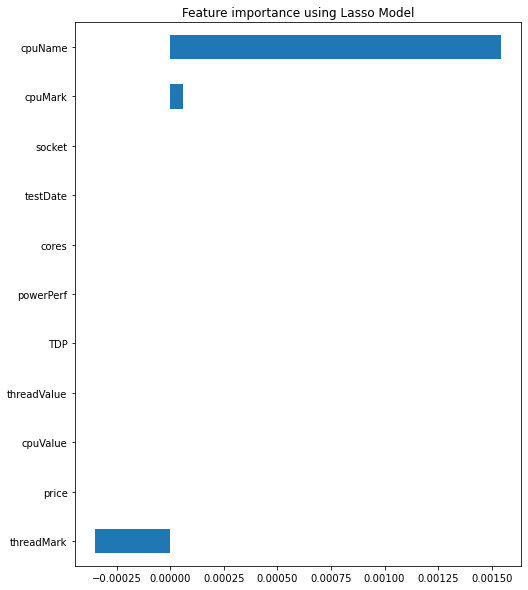

In [202]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Dimensionality Reduction

* PCA is a common method to achieve dimensionality reduction

In [70]:
from sklearn.decomposition import PCA
X_train2 = PCA(n_components=3).fit_transform(X_train)
X_test2 = PCA(n_components=3).fit_transform(X_test)

# Clustering

Normalization dramatically improves model accuracy.

Normalization gives equal weights or importance to each variable so that no single variable steers model performance in one direction just because they are bigger numbers.

For example, clustering algorithms use distance measures to determine if an observation should belong to a certain cluster. “Euclidean distance” is often used to measure those distances. If a variable has significantly higher values, it can dominate distance measures, suppressing other variables with small values.

In [115]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

Value Counts
0    622
5    257
3    144
7    100
1     84
6     41
4     27
8     14
2      9
dtype: int64


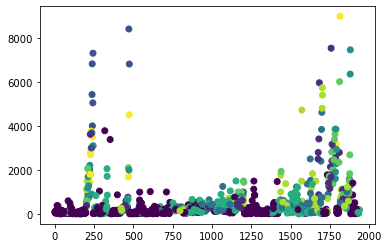

In [123]:
# inputs (NOT normalized)
X_not_norm = X_train.values
# instantiate model
KM = KMeans(n_clusters = 9)
# fit predict
Y_pred = KM.fit_predict(X_not_norm)
# visualizing clusters
plt.scatter(X_not_norm[:,0], X_not_norm[:,1], c=KM.labels_, cmap='viridis')
# counts per cluster
print("Value Counts")
print(pd.value_counts(Y_pred))

Value Counts
8    294
0    196
3    191
4    180
1    167
5    139
2     85
7     32
6     14
dtype: int64


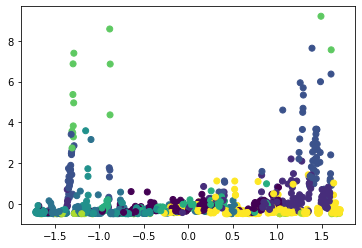

In [122]:
# normalizing inputs
X_norm = preprocessing.scale(X_train)
# instantiate model
KM = KMeans(n_clusters = 9)
# fit predict
Y_pred = KM.fit_predict(X_norm)
print("Value Counts")
print(pd.value_counts(Y_pred))
# visualize clusters
plt.scatter(X_norm[:,0], X_norm[:,1], c=KM.labels_, cmap='viridis')

In [126]:
from sklearn.metrics import silhouette_score

sil = []
kmax = list(range(2,9))

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in kmax:
    kmeans = KMeans(n_clusters = k).fit(X_train)
    labels = kmeans.labels_
    sil.append(silhouette_score(X_train, labels, metric = 'euclidean'))
    print(sil)

[0.741527238817911]
[0.741527238817911, 0.6990042568438851]
[0.741527238817911, 0.6990042568438851, 0.6438277512525322]
[0.741527238817911, 0.6990042568438851, 0.6438277512525322, 0.5980148278085707]
[0.741527238817911, 0.6990042568438851, 0.6438277512525322, 0.5980148278085707, 0.5870204739318803]
[0.741527238817911, 0.6990042568438851, 0.6438277512525322, 0.5980148278085707, 0.5870204739318803, 0.5666173070565614]
[0.741527238817911, 0.6990042568438851, 0.6438277512525322, 0.5980148278085707, 0.5870204739318803, 0.5666173070565614, 0.5610642276230088]


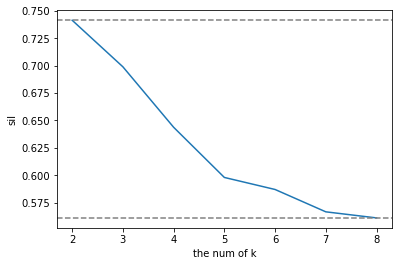

In [127]:
plt.plot(kmax,sil)
plt.xlabel("the num of k")
plt.ylabel("sil")
plt.axhline(np.min(sil),linestyle='--',color='0.5')
plt.axhline(np.max(sil),linestyle='--',color='0.5')


In [128]:
kmeans = KMeans(n_clusters = 2).fit(X_train)
labels = kmeans.labels_
sil = silhouette_score(X_train, labels, metric = 'euclidean')
print("The best k is 2",",","Silhouette_score",sil)

The best k is 2 , Silhouette_score 0.741527238817911


Value Counts
0    890
1    408
dtype: int64


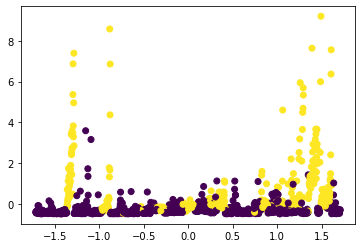

In [129]:
# normalizing inputs
X_norm = preprocessing.scale(X_train)
# instantiate model
KM = KMeans(n_clusters = 2)
# fit predict
Y_pred = KM.fit_predict(X_norm)
print("Value Counts")
print(pd.value_counts(Y_pred))
# visualize clusters
plt.scatter(X_norm[:,0], X_norm[:,1], c=KM.labels_, cmap='viridis')

# Classification

In [49]:
# import library
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import preprocessing

In [192]:
X=df.drop("category",axis=1)
y=df.category

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=7703)
X_train.shape, Y_train.shape, X_test.shape,Y_test.shape

((1298, 11), (1298,), (640, 11), (640,))

## Logistic regression

In [71]:
# Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)  
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
F1_log = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)
print("Logistic regression accuracy",acc_log)
print("Logistic regression F1score",F1_log)

Logistic regression accuracy 68.57
Logistic regression F1score 62.49


In [72]:
# Normalization
X_train1 = preprocessing.scale(X_train)
X_test1 = preprocessing.scale(X_test)
# Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train1, Y_train)
Y_pred = logreg.predict(X_test1)  
acc_log1 = round(logreg.score(X_train1, Y_train) * 100, 2)
F1_log1 = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)
print("Logistic regression accuracy",acc_log1)
print("Logistic regression F1score",F1_log1)

Logistic regression accuracy 76.81
Logistic regression F1score 74.23


In [106]:
#pca
n_max = list(range(2,11))
acc_list=[]
f1_list=[]
for n in n_max:
    X_train2 = PCA(n_components=n).fit_transform(X_train)
    X_test2 = PCA(n_components=n).fit_transform(X_test)
    # Logistic regression
    logreg = LogisticRegression()
    logreg.fit(X_train2, Y_train)
    Y_pred = logreg.predict(X_test2)  
    acc_log2 = round(logreg.score(X_train2, Y_train) * 100, 2)
    F1_log2 = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)
    acc_list.append(acc_log2)
    f1_list.append(F1_log2)
    print("Logistic regression accuracy",acc_log2)
    print("Logistic regression F1score",F1_log2)


Logistic regression accuracy 47.23
Logistic regression F1score 47.96
Logistic regression accuracy 63.33
Logistic regression F1score 36.44
Logistic regression accuracy 66.49
Logistic regression F1score 39.42
Logistic regression accuracy 72.5
Logistic regression F1score 49.65
Logistic regression accuracy 72.8
Logistic regression F1score 49.82
Logistic regression accuracy 72.96
Logistic regression F1score 49.11
Logistic regression accuracy 72.88
Logistic regression F1score 49.66
Logistic regression accuracy 72.88
Logistic regression F1score 49.76
Logistic regression accuracy 72.96
Logistic regression F1score 50.15


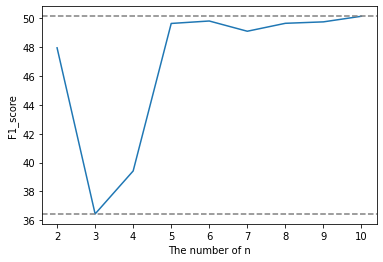

In [107]:
plt.plot(n_max,f1_list)
plt.xlabel("The number of n")
plt.ylabel("F1_score")
plt.axhline(np.min(f1_list),linestyle='--',color='0.5')
plt.axhline(np.max(f1_list),linestyle='--',color='0.5')

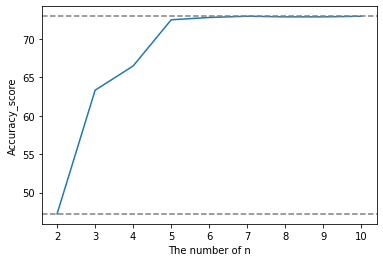

In [108]:
plt.plot(n_max,acc_list)
plt.xlabel("The number of n")
plt.ylabel("Accuracy_score")
plt.axhline(np.min(acc_list),linestyle='--',color='0.5')
plt.axhline(np.max(acc_list),linestyle='--',color='0.5')

## SVM

In [76]:
# Support vector machine
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
F1_svc = round(f1_score(Y_test, Y_pred, average='weighted')*100, 2)
print("SVM accuracy",acc_svc)
print("SVM F1score",F1_svc)

SVM accuracy 66.87
SVM F1score 51.84


In [77]:
# Normalization
X_train1 = preprocessing.scale(X_train)
X_test1 = preprocessing.scale(X_test)
svc = SVC()
svc.fit(X_train1, Y_train)
Y_pred = svc.predict(X_test1)
acc_svc1 = round(svc.score(X_train1, Y_train) * 100, 2)
F1_svc1 = round(f1_score(Y_test, Y_pred, average='weighted')*100, 2)
print("SVM accuracy with normalization",acc_svc1)
print("SVM F1score with normalization",F1_svc1)

SVM accuracy with normalization 88.91
SVM F1score with normalization 82.54


In [78]:
#Pca
X_train2 = PCA(n_components=3).fit_transform(X_train)
X_test2 = PCA(n_components=3).fit_transform(X_test)
svc = SVC()
svc.fit(X_train2, Y_train)
Y_pred = svc.predict(X_test2)
acc_svc2 = round(svc.score(X_train2, Y_train) * 100, 2)
F1_svc2 = round(f1_score(Y_test, Y_pred, average='weighted')*100, 2)
print("SVM accuracy with normalization",acc_svc2)
print("SVM F1score with normalization",F1_svc2)

SVM accuracy with normalization 58.55
SVM F1score with normalization 40.52


As the result shown above, normalization dramatically improves model accuracy.

## KNN

What is the best value of k? 

In [109]:
# KNN
n_arr=list(range(2,11))
accuracy_knn=[]
F1_score_knn=[]
for k in n_arr: 
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
    F1=f1_score(Y_test, Y_pred, average='weighted')
    F1_score_knn.append(F1)
    accuracy_knn.append(acc_knn)
print(F1_score_knn)
print(accuracy_knn)

[0.7456667801809396, 0.7729973201544686, 0.7450371913961176, 0.7615430402102799, 0.7399088973355782, 0.7497882538443769, 0.7344451642794321, 0.7336660441426146, 0.7148485143794302]
[88.44, 88.44, 84.9, 83.59, 83.05, 82.59, 81.82, 80.59, 80.74]


Plotting the performance of different k according to F1_score and accuracy respectively.

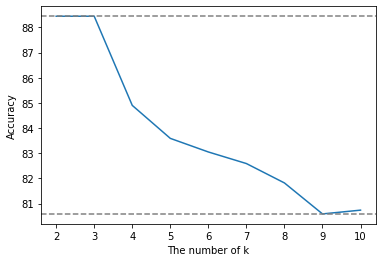

In [110]:
plt.plot(n_arr,accuracy_knn)
plt.xlabel("The number of k")
plt.ylabel("Accuracy")
plt.axhline(np.min(accuracy_knn),linestyle='--',color='0.5')
plt.axhline(np.max(accuracy_knn),linestyle='--',color='0.5')

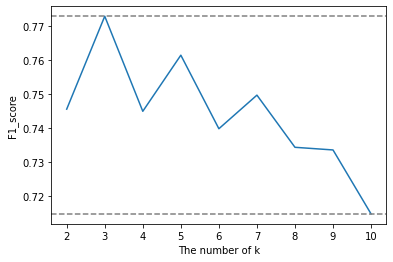

In [111]:
plt.plot(n_arr,F1_score_knn)
plt.xlabel("The number of k")
plt.ylabel("F1_score")
plt.axhline(np.min(F1_score_knn),linestyle='--',color='0.5')
plt.axhline(np.max(F1_score_knn),linestyle='--',color='0.5')

In [112]:
# The best of k is 3 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
F1_knn = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)

print("KNN accuracy",acc_knn)
print("KNN F1score",F1_knn)

KNN accuracy 88.44
KNN F1score 77.3


In [113]:
# Normalization
X_train1 = preprocessing.scale(X_train)
X_test1 = preprocessing.scale(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train1, Y_train)
Y_pred = knn.predict(X_test1)
acc_knn1 = round(knn.score(X_train1, Y_train) * 100, 2)
F1_knn1 = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)

print("KNN accuracy",acc_knn1)
print("KNN F1score",F1_knn1)

KNN accuracy 93.84
KNN F1score 85.79


In [114]:
#Pca
X_train2 = PCA(n_components=3).fit_transform(X_train)
X_test2 = PCA(n_components=3).fit_transform(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train2, Y_train)
Y_pred = knn.predict(X_test2)
acc_knn2 = round(knn.score(X_train2, Y_train) * 100, 2)
F1_knn2 = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)

print("KNN accuracy",acc_knn2)
print("KNN F1score",F1_knn2)

KNN accuracy 84.36
KNN F1score 37.44


## Naive Bayesian classifier

In [85]:
# Naive Bayesian
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
F1_gaussian = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)
print("Gaussian accuracy",acc_gaussian)
print("Gaussian F1score",F1_gaussian)

Gaussian accuracy 55.55
Gaussian F1score 57.09


In [86]:
# Normalization
X_train1 = preprocessing.scale(X_train)
X_test1 = preprocessing.scale(X_test)

# Naive Bayesian
gaussian = GaussianNB()
gaussian.fit(X_train1, Y_train)
Y_pred = gaussian.predict(X_test1)
acc_gaussian1 = round(gaussian.score(X_train1, Y_train) * 100, 2)
F1_gaussian1 = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)
print("Gaussian accuracy",acc_gaussian1)
print("Gaussian F1score",F1_gaussian1)

Gaussian accuracy 55.47
Gaussian F1score 61.07


In [87]:
#Pca
X_train2 = PCA(n_components=3).fit_transform(X_train)
X_test2 = PCA(n_components=3).fit_transform(X_test)


# Naive Bayesian
gaussian = GaussianNB()
gaussian.fit(X_train2, Y_train)
Y_pred = gaussian.predict(X_test2)
acc_gaussian2 = round(gaussian.score(X_train2, Y_train) * 100, 2)
F1_gaussian2 = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)
print("Gaussian accuracy",acc_gaussian2)
print("Gaussian F1score",F1_gaussian2)

Gaussian accuracy 40.22
Gaussian F1score 31.92


## Perceptron

In [88]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
F1_perceptron = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)
print("perceptron accuracy",acc_perceptron)
print("perceptron F1score",F1_perceptron)

perceptron accuracy 65.18
perceptron F1score 56.16


In [89]:
# Normalization
X_train1 = preprocessing.scale(X_train)
X_test1 = preprocessing.scale(X_test)

# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train1, Y_train)
Y_pred = perceptron.predict(X_test1)
acc_perceptron1 = round(perceptron.score(X_train1, Y_train) * 100, 2)
F1_perceptron1 = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)
print("perceptron accuracy",acc_perceptron1)
print("perceptron F1score",F1_perceptron1)

perceptron accuracy 74.11
perceptron F1score 74.23


In [90]:
#Pca
X_train2 = PCA(n_components=3).fit_transform(X_train)
X_test2 = PCA(n_components=3).fit_transform(X_test)

# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train2, Y_train)
Y_pred = perceptron.predict(X_test2)
acc_perceptron2 = round(perceptron.score(X_train2, Y_train) * 100, 2)
F1_perceptron2 = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)
print("perceptron accuracy",acc_perceptron2)
print("perceptron F1score",F1_perceptron2)

perceptron accuracy 21.88
perceptron F1score 19.57


## Linear SVC

In [91]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
F1_linear_svc = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)
print("linear_svc accuracy",acc_linear_svc)
print("linear_svc F1score",F1_linear_svc)

linear_svc accuracy 40.6
linear_svc F1score 28.24


In [92]:
# Normalization
X_train1 = preprocessing.scale(X_train)
X_test1 = preprocessing.scale(X_test)

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train1, Y_train)
Y_pred = linear_svc.predict(X_test1)
acc_linear_svc1 = round(linear_svc.score(X_train1, Y_train) * 100, 2)
F1_linear_svc1 = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)
print("linear_svc accuracy",acc_linear_svc1)
print("linear_svc F1score",F1_linear_svc1)

linear_svc accuracy 76.04
linear_svc F1score 74.25


In [93]:
#Pca
X_train2 = PCA(n_components=3).fit_transform(X_train)
X_test2 = PCA(n_components=3).fit_transform(X_test)

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train2, Y_train)
Y_pred = linear_svc.predict(X_test2)
acc_linear_svc2 = round(linear_svc.score(X_train2, Y_train) * 100, 2)
F1_linear_svc2 = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)
print("linear_svc accuracy",acc_linear_svc2)
print("linear_svc F1score",F1_linear_svc2)

linear_svc accuracy 34.51
linear_svc F1score 29.24


## Decision tree

In [94]:
# Decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
F1_decision_tree = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)

print("Decision_tree accuracy",acc_decision_tree)
print("Decision_tree F1score",F1_decision_tree)

Decision_tree accuracy 100.0
Decision_tree F1score 91.37


In [95]:
# Normalization
X_train1 = preprocessing.scale(X_train)
X_test1 = preprocessing.scale(X_test)

# Decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train1, Y_train)
Y_pred = decision_tree.predict(X_test1)
acc_decision_tree1 = round(decision_tree.score(X_train1, Y_train) * 100, 2)
F1_decision_tree1 = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)

print("Decision_tree accuracy",acc_decision_tree1)
print("Decision_tree F1score",F1_decision_tree1)

Decision_tree accuracy 100.0
Decision_tree F1score 85.62


In [96]:
#Pca
X_train2 = PCA(n_components=3).fit_transform(X_train)
X_test2 = PCA(n_components=3).fit_transform(X_test)

# Decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train2, Y_train)
Y_pred = decision_tree.predict(X_test2)
acc_decision_tree2 = round(decision_tree.score(X_train2, Y_train) * 100, 2)
F1_decision_tree2 = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)

print("Decision_tree accuracy",acc_decision_tree2)
print("Decision_tree F1score",F1_decision_tree2)

Decision_tree accuracy 100.0
Decision_tree F1score 37.71


## Random forest

In [97]:
# Random forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
F1_random_forest = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)

print("Random_forest accuracy",acc_random_forest)
print("Random_forest F1score",F1_random_forest )

Random_forest accuracy 100.0
Random_forest F1score 91.63


In [98]:
# Normalization
X_train1 = preprocessing.scale(X_train)
X_test1 = preprocessing.scale(X_test)

# Random forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train1, Y_train)
Y_pred = random_forest.predict(X_test1)
random_forest.score(X_train1, Y_train)
acc_random_forest1 = round(random_forest.score(X_train1, Y_train) * 100, 2)
F1_random_forest1 = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)

print("Random_forest accuracy",acc_random_forest1)
print("Random_forest F1score",F1_random_forest1 )

Random_forest accuracy 100.0
Random_forest F1score 89.09


In [99]:
#Pca
X_train2 = PCA(n_components=3).fit_transform(X_train)
X_test2 = PCA(n_components=3).fit_transform(X_test)

# Random forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train2, Y_train)
Y_pred = random_forest.predict(X_test2)
random_forest.score(X_train2, Y_train)
acc_random_forest2 = round(random_forest.score(X_train2, Y_train) * 100, 2)
F1_random_forest2 = round(f1_score(Y_test, Y_pred, average='weighted')*100,2)

print("Random_forest accuracy",acc_random_forest2)
print("Random_forest F1score",F1_random_forest2)

Random_forest accuracy 100.0
Random_forest F1score 38.31


## Evaluation

**Accuracy**

Accuracy is the set of labels predicted for a sample must exactly match the corresponding set of labels in groundtruth.

In [100]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
               'Linear SVC', 'Decision Tree'],
    'Accuracy Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
3,Random Forest,100.00
7,Decision Tree,100.00
1,KNN,88.44
2,Logistic Regression,68.57
0,Support Vector Machines,66.87
5,Perceptron,65.18
4,Naive Bayes,55.55
6,Linear SVC,40.60


In [101]:
# With normalization
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Linear SVC', 'Decision Tree'],
    'Accuracy Score': [acc_svc1, acc_knn1, acc_log1, 
              acc_random_forest1, acc_gaussian1, acc_perceptron1, 
              acc_linear_svc1, acc_decision_tree1]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
3,Random Forest,100.00
7,Decision Tree,100.00
1,KNN,93.84
0,Support Vector Machines,88.91
2,Logistic Regression,76.81
6,Linear SVC,76.04
5,Perceptron,74.11
4,Naive Bayes,55.47


In [102]:
# With pca
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Linear SVC', 'Decision Tree'],
    'Accuracy Score': [acc_svc2, acc_knn2, acc_log2, 
              acc_random_forest2, acc_gaussian2, acc_perceptron2, 
              acc_linear_svc2, acc_decision_tree2]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
3,Random Forest,100.00
7,Decision Tree,100.00
1,KNN,84.36
2,Logistic Regression,72.88
0,Support Vector Machines,58.55
4,Naive Bayes,40.22
6,Linear SVC,34.51
5,Perceptron,21.88


**F1 score**

In [103]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Linear SVC', 'Decision Tree'],
    'F1 Score': [F1_svc, F1_knn, F1_log, 
              F1_random_forest, F1_gaussian, F1_perceptron, 
              F1_linear_svc, F1_decision_tree]})
models.sort_values(by='F1 Score', ascending=False)

,Model,F1 Score
3,Random Forest,91.63
7,Decision Tree,91.37
1,KNN,77.30
2,Logistic Regression,62.49
4,Naive Bayes,57.09
5,Perceptron,56.16
0,Support Vector Machines,51.84
6,Linear SVC,28.24


In [104]:
# With normalization
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Linear SVC', 'Decision Tree'],
    'F1 Score': [F1_svc1, F1_knn1, F1_log1, 
              F1_random_forest1, F1_gaussian1, F1_perceptron1, 
             F1_linear_svc1, F1_decision_tree1]})
models.sort_values(by='F1 Score', ascending=False)

,Model,F1 Score
3,Random Forest,89.09
1,KNN,85.79
7,Decision Tree,85.62
0,Support Vector Machines,82.54
6,Linear SVC,74.25
2,Logistic Regression,74.23
5,Perceptron,74.23
4,Naive Bayes,61.07


Normalization has some drawbacks as well. 
* Normalization compresses data within a certain range, reduces the variance and applies equal weights to all features. The model lose a lot of important information in the process.
* For example, normalization lease absolutely no traces of outliers. The model treat outliers as noise and it needs to get rid of them as soon as possible. But outliers are real data points, once we lose that to get a better model, we may lose some important information.

In [105]:
# With pca
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Linear SVC', 'Decision Tree'],
    'F1 Score': [F1_svc2, F1_knn2, F1_log2, 
              F1_random_forest2, F1_gaussian2, F1_perceptron2, 
             F1_linear_svc2, F1_decision_tree2]})
models.sort_values(by='F1 Score', ascending=False)

,Model,F1 Score
2,Logistic Regression,49.76
0,Support Vector Machines,40.52
3,Random Forest,38.31
7,Decision Tree,37.71
1,KNN,37.44
4,Naive Bayes,31.92
6,Linear SVC,29.24
5,Perceptron,19.57


# Regression

## Import library

In [23]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

## Data preparation

In [165]:
df

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
1,243,7299.99,88338,12.10,2635,0.36,280.0,315.49,64,2021,114,8
3,241,7060.00,85861,12.16,2727,0.39,225.0,381.6,64,2021,114,8
4,474,6807.98,83971,12.33,2626,0.39,280.0,299.9,64,2020,129,0
5,471,8399.69,81568,9.71,2569,0.31,280.0,291.31,64,2020,128,0
8,237,5424.99,76455,14.09,2695,0.50,225.0,339.8,48,2021,114,8
...,...,...,...,...,...,...,...,...,...,...,...,...
3696,194,50.95,195,3.83,301,5.90,66.0,2.96,1,2009,117,0
3697,195,58.99,195,3.31,311,5.28,70.0,2.79,1,2009,117,0
3725,539,635.99,177,0.28,254,0.40,10.0,17.7,1,2010,29,0
3727,193,51.25,176,3.44,272,5.30,64.0,2.75,1,2009,118,0


In [166]:
df1=df.drop("cpuName",axis=1)
df1=df1.drop("socket",axis=1)
df1=df1.drop("category",axis=1)
df1

,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate
1,7299.99,88338,12.10,2635,0.36,280.0,315.49,64,2021
3,7060.00,85861,12.16,2727,0.39,225.0,381.6,64,2021
4,6807.98,83971,12.33,2626,0.39,280.0,299.9,64,2020
5,8399.69,81568,9.71,2569,0.31,280.0,291.31,64,2020
8,5424.99,76455,14.09,2695,0.50,225.0,339.8,48,2021
...,...,...,...,...,...,...,...,...,...
3696,50.95,195,3.83,301,5.90,66.0,2.96,1,2009
3697,58.99,195,3.31,311,5.28,70.0,2.79,1,2009
3725,635.99,177,0.28,254,0.40,10.0,17.7,1,2010
3727,51.25,176,3.44,272,5.30,64.0,2.75,1,2009


In [167]:
df1.columns

Index(['price', 'cpuMark', 'cpuValue', 'threadMark', 'threadValue', 'TDP',
       'powerPerf', 'cores', 'testDate'],
      dtype='object')

In [168]:
y=df1.price
X=df1.drop("price",axis=1)

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=7703)
X_train.shape, Y_train.shape, X_test.shape,Y_test.shape

((1298, 8), (1298,), (640, 8), (640,))

## Cross-validation

In [170]:
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse = np.sqrt(-cross_val_score(model, X_train.values, Y_train, scoring="neg_mean_squared_error", cv=kf))
    return(rmse)

### LASSO Regression

* The lasso regression is a traditional linear regression objective function followed by an L1 regurlization.
* This enables the coefficients of insignificant features to be compressed to 0. We could get a more accurate parameter estimation.

In [171]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
lasso_score = rmsle_cv(lasso)


### Kernel Ridge Regression

* Ridge regression is a method of compressed estimation by adding an L2 regurlzation in the objective function. Both of two methods can prevent overfitting.
* Kernel ridge regression is a model in which the data transform kernel to fit various nonlinear situations, and then perform ridge regression.

In [172]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR_score = rmsle_cv(KRR)

### ElasticNet Regression

When multiple features are correlated, Lasso regression may select only one of them at random, while Ridge regression selects all of them. ElasticNet Regression combines their advantages.

In [173]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet_score = rmsle_cv(ENet)

### Gradient Boosting Regression

Gradient Boosting Regression is an ensemble method which is based on CART regression tree.There is huge difference between GBRT and Random forest. GBRT is using the boosing method, while Random forest is using the bagging method.

In [174]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state=5)
GBoost_score = rmsle_cv(GBoost)

In [175]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.5, gamma=0.05,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.8, n_estimators=2200,
                             reg_alpha=0.5, reg_lambda=0.8,
                             subsample=0.5, random_state=7, nthread=-1)
model_xgb_score = rmsle_cv(model_xgb)

In [176]:
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin=55, bagging_fraction=0.8,
                              bagging_freq=5, feature_fraction=0.2,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf=6, min_sum_hessian_in_leaf=11, verbose=-1)
model_lgb_score = rmsle_cv(model_lgb)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] 

## Evaluation

In [177]:
models = pd.DataFrame({
    'Model': ['lasso', 'KRR', 'ENet', 
              'GBoost', 'model_xgb', 'model_lgb'],
    'Score_mean': [lasso_score.mean(), KRR_score.mean(), ENet_score.mean(), GBoost_score.mean(), 
              model_xgb_score.mean(), model_lgb_score.mean()],
    'Score_std': [lasso_score.std(), KRR_score.mean(), ENet_score.std(), GBoost_score.std(), 
              model_xgb_score.std(), model_lgb_score.std()]})
models.sort_values(by='Score_mean', ascending=True)

,Model,Score_mean,Score_std
4,model_xgb,103.286651,16.270484
3,GBoost,151.317388,30.725794
5,model_lgb,205.631467,24.679725
2,ENet,526.109880,62.958748
0,lasso,526.111222,62.959285
1,KRR,542.452726,542.452726


In [178]:
models.sort_values(by='Score_std', ascending=True)

,Model,Score_mean,Score_std
4,model_xgb,103.286651,16.270484
5,model_lgb,205.631467,24.679725
3,GBoost,151.317388,30.725794
2,ENet,526.109880,62.958748
0,lasso,526.111222,62.959285
1,KRR,542.452726,542.452726


### Ensemble the LightGBM and XGBoost

Root mean square error (RMSE) is a measure of how spread out these residuals are. Residuals are a measure of how far from the regression line data points are. RMSE is smaller, the model is better for regression task.

In [179]:
# Define evaluation score.
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

* LightGBM

In [180]:
model_lgb.fit(X_train.values, Y_train)
lgb_train_pred = model_lgb.predict(X_train.values)
lgb_pred = np.expm1(model_lgb.predict(X_test.values))
print(rmsle(Y_train, lgb_train_pred))

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
112.61293148153933


* XGBoost

In [181]:
model_xgb.fit(X_train.values, Y_train)
xgb_train_pred = model_xgb.predict(X_train.values)
xgb_pred = np.expm1(model_xgb.predict(X_test.values))
print(rmsle(Y_train, xgb_train_pred))

6.1024173598416835


In [182]:
ensemble = xgb_pred*0.5 + lgb_pred*0.5
ensemble

array([            inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,  3.46589623e+25,  2.14215827e+37,
        9.37751694e+01,  1.09917858e+19,             inf,             inf,
        2.45490290e+02,  9.97934660e+34,             inf,  5.57204772e+11,
                   inf,  3.71563276e+15,             inf,             inf,
                   inf,             inf,             inf,             inf,
        1.36056258e+23,             inf,             inf,  2.32192932e+02,
                   inf,  5.69980338e+27,             inf,  7.01539988e+51,
        7.27440545e+25,             inf,             inf,             inf,
                   inf,             inf,  4.80884172e+12,  1.93677664e+21,
                   inf,             inf,  7.90809753e+12,             inf,
                   inf,             inf,             inf,             inf,
                   inf,  

In [183]:
print('Ensemble model RMSE_score:{}'.format(rmsle(Y_train, xgb_train_pred*0.5 + lgb_train_pred*0.5)))

Ensemble model RMSE_score:56.61433091319373


# Discussion